# Lab 2: Boston Housing

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Lab


## 0. Load and visualize the data

In [ ]:
# load data from your google drive using pandas
data = pd.read_csv('/content/drive/My Drive/boston.csv')


# visualize the first 10 rows of the data table
data.head(10)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


## 1.Understand the dataset values

Analyze the dataset shape, means, distributions


In [ ]:
#see size of dataset
data.shape

(506, 14)

1. The dataset has 14 columns and 506 rows:
14 features and 506 samples

2. The Features are:
- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per 10,000 dollars
- PTRATIO - pupil-teacher ratio by town
- B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT - % lower status of the population
- MEDV - Median value of owner-occupied homes in 1000 dollars

In [ ]:
#first check the statistic info of the data
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


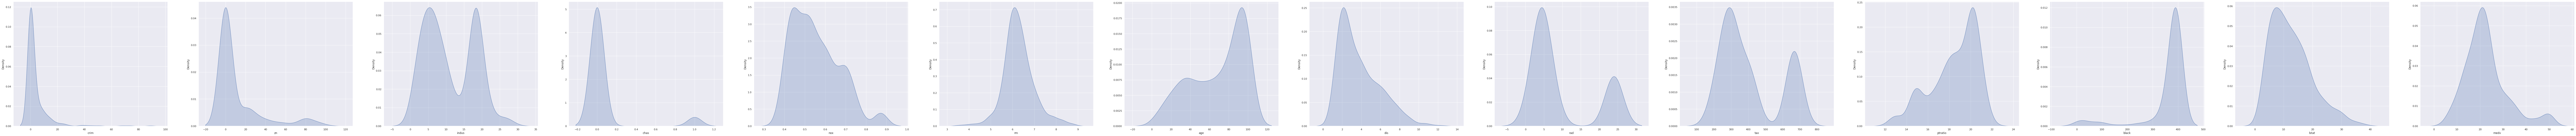

In [ ]:
fig, axes = plt.subplots(1, len(data.columns))

sns.set(rc={"figure.figsize":(250, 10)})

index = 0
for col in data.columns:
    sns.kdeplot(data=data[col], shade=True, ax = axes[index])
    index = index+1


If you click on the graphs to enlarge them, you will see that most of them don't follow a nice gaussian distribution well, and that many of the features actuall hvae high variance in their samples.  

## Find relationships between Features and Label

Visualize and Analyse the data to find what features are most related to the label

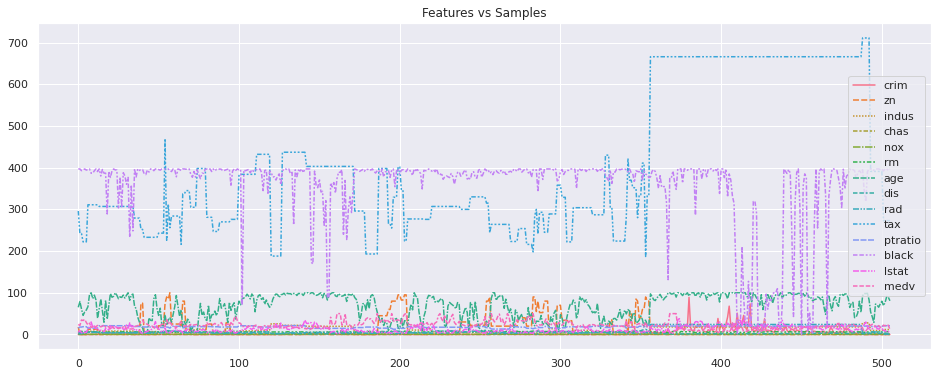

In [ ]:
plt.figure(figsize=(16,6))
plt.title("Features vs Samples")

sns.lineplot(data = data)

As you can see, the size of the tax ans black feature values are relatively larger than the other values. **And** it isn't as clear from this plot if any of the features are correlated with each other

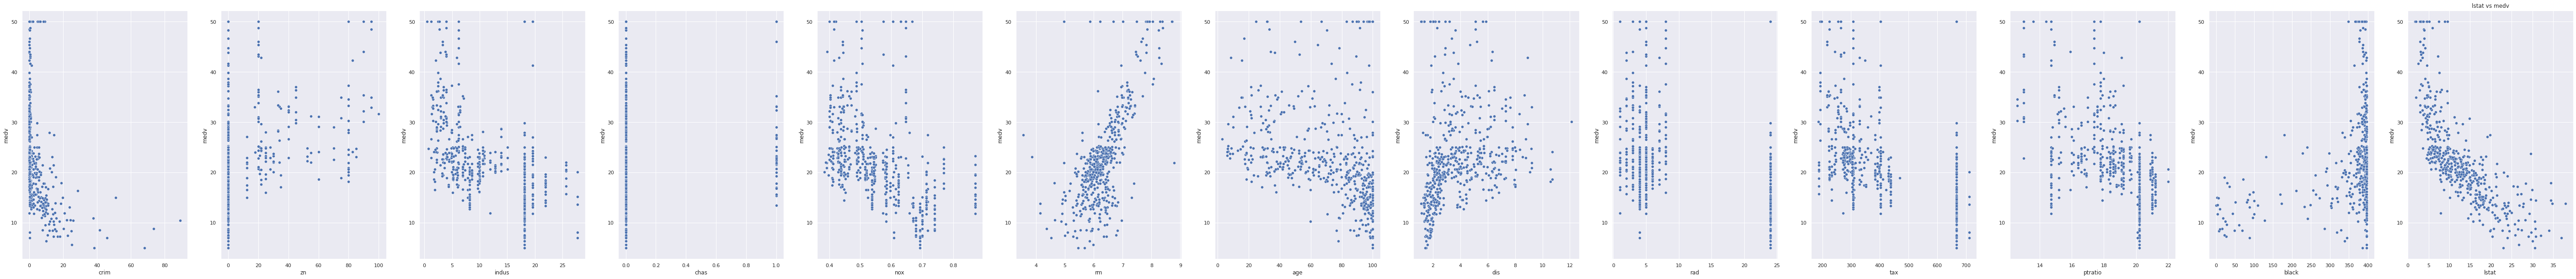

In [ ]:
#plotting the different features with respect medv (which is house price)
fig, axes = plt.subplots(1, 13, figsize=(100, 10))

for index, col in enumerate(data.columns):
  # data.plot(kind = 'scatter', x = col, y = 'medv', ax = axes[index])
  sns.scatterplot(x = data[col], y = data['medv'], ax = axes[index])
  title = col + ' vs medv'
  plt.title(title)
  plt.xlabel(col)
  index = index+1
  if(index == 13):
    break

As you can see, there are few features with linear relationships with medv, but most of the features don't have a clear linear relationship with medv.

You can see the strength of this relationship **below** using a covariance matrix (to measure to covariance between mdev and the individual features).

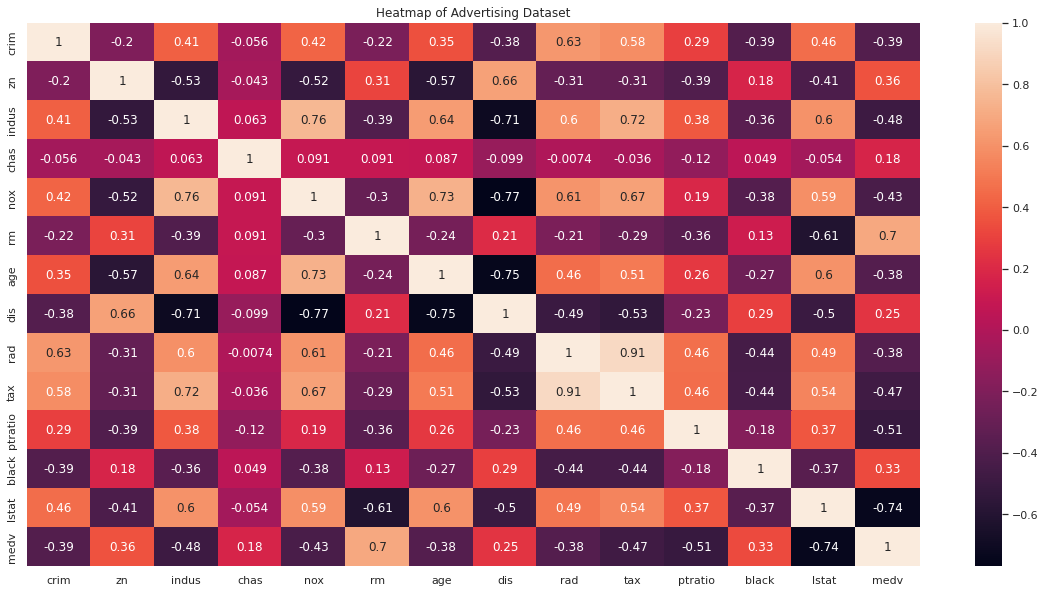

In [56]:
plt.figure(figsize=(20, 10))
plt.title('Heatmap of Advertising Dataset')
corr = data.corr()
sns.heatmap(data=corr, annot=True)


1. It is interesting to note here that there are many features with moderate correlations to other features, and many features with stronger positive and negative correlations with others.

2. mdev has the strongest correlations with lstat (negative) and rm (positive)

In [ ]:
# show your code for one predictor's result here
lm = smf.ols(formula='Sales ~ TV', data=data).fit()

# print the coefficients
lm.params

Intercept    7.032594
TV           0.047537
dtype: float64

## 2. Use all predictors for multiple linear regression. 

Discuss your finding about which predictor(s) has(have) the strongest relation with the response. 

In [ ]:
# show your code that involves all predictors for regression

### If you think selecting a subset of predictors would help improve the regression results, explain which subset you choose and why.

In [ ]:
# show you code with your selected subset of predictors

## 3. Add interaction effects

In [ ]:
# try with all possible Interaction combinations, which combination is significant to the response?


## 4. Explore non-linear effects of predictors. e.g. polynomial

In [ ]:
# your code here

## 5. Explore other generalizations of linear model

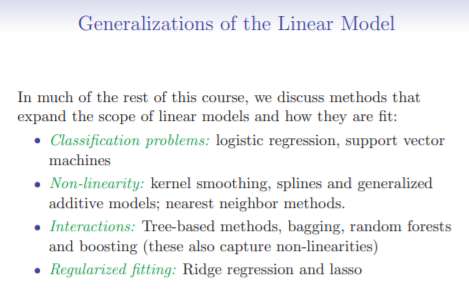

In [ ]:
# your code here